In [166]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
df=pd.read_csv('/Users/celty/Desktop/MBAN 6110/Assignment 2/experiment_dataset.csv')
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [168]:
# Change the Unnamed: 0 into User ID
df['Unnamed: 0']=df['Unnamed: 0']+1
df=df.rename(columns={'Unnamed: 0': 'User ID'})

In [169]:
df.head()

,User ID,Age,Location,Device,Variant,Time Spent,CTR
0,1,62,Location2,Device2,Control,13.928669,0.084776
1,2,18,Location1,Device1,Variant B,11.310518,0.096859
2,3,21,Location2,Device1,Variant B,24.842100,0.097630
3,4,21,Location1,Device3,Variant B,20.061300,0.109783
4,5,57,Location1,Device2,Variant B,34.495503,0.068579


In [170]:
check_na=df.isnull().any().any()
if check_na:
    print('True')
else:
    print('False')

#No N/A data exists.

False


In [171]:
check_dp=df.duplicated().any().any()
if check_dp:
    print('True')
else:
    print('False')

#No duplicates.

False


In [172]:
df.describe()
#Outliers will not be cleaned due to the validity and reasonability of their existence.
#The data is clean.

,User ID,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,1.000000,18.000000,7.114806,0.012975
25%,250.750000,28.000000,19.216608,0.094286
50%,500.500000,41.000000,22.506707,0.108944
75%,750.250000,53.000000,26.255950,0.124238
max,1000.000000,64.000000,39.395770,0.172728


<Axes: xlabel='Age', ylabel='CTR'>

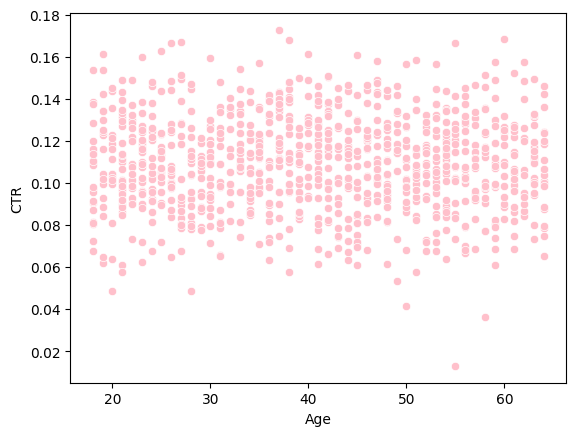

In [173]:
# Check if the age would incluence the users' behaviour.
sns.scatterplot(x='Age', y='CTR',data=df, color="pink")

<Axes: xlabel='Age', ylabel='Time Spent'>

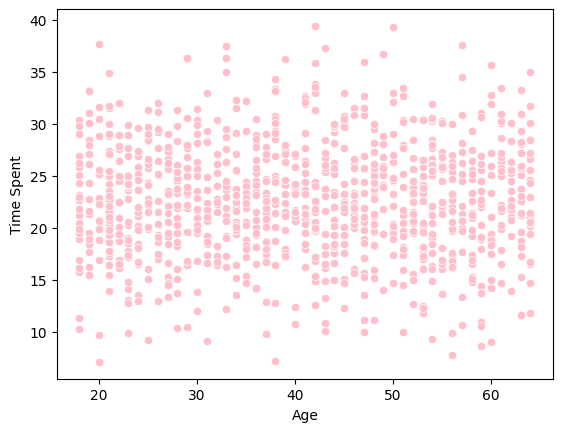

In [174]:
sns.scatterplot(x='Age', y='Time Spent',data=df,color='pink')

Due to the inelastic distribution range of the two scatterplots, the age does not have a significant impact on either CTR or Time Spent.

In [175]:
# Also, check if the location and device would incluence the users' behaviour.
# Take a look at the categories of each attributes.
num_location=df['Location'].unique()
num_device=df['Device'].unique()
num_variant=df['Variant'].unique()
print(num_location,num_device,num_variant)

['Location2' 'Location1' 'Location3'] ['Device2' 'Device1' 'Device3'] ['Control' 'Variant B' 'Variant A']


In [176]:
dev_1 = df[df['Device'] == 'Device1']['CTR']
dev_2 = df[df['Device'] == 'Device2']['CTR']
dev_3 = df[df['Device'] == 'Device3']['CTR']
p_dev_ctr = stats.f_oneway(dev_1, dev_2, dev_3)
dev_1 = df[df['Device'] == 'Device1']['Time Spent']
dev_2 = df[df['Device'] == 'Device2']['Time Spent']
dev_3 = df[df['Device'] == 'Device3']['Time Spent']
p_dev_ts = stats.f_oneway(dev_1, dev_2, dev_3)

loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']
p_loc_ctr = stats.f_oneway(dev_1, dev_2, dev_3)
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']
p_loc_ts = stats.f_oneway(dev_1, dev_2, dev_3)

df1=list()
df1.append([p_dev_ctr[1],p_dev_ts[1],p_loc_ctr[1],p_loc_ts[1]])
print('P values are:',df1)


P values are: [[0.4916042399968955, 0.7661459958744103, 0.7661459958744103, 0.7661459958744103]]


P values are all largely above 0.05, indicating a safe environment to analyze the difference between the two Features and the Control group.

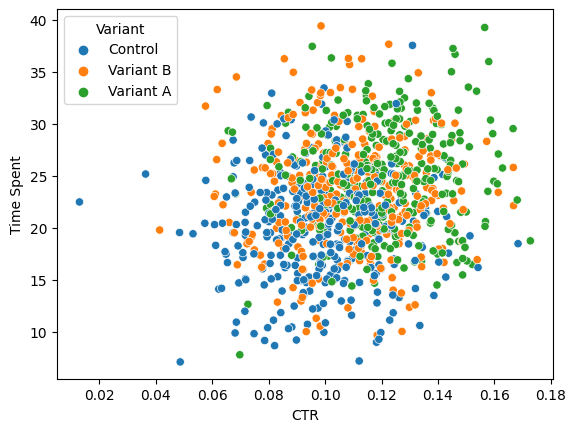

In [177]:
# Check the performance of both CTR and Time Spent using scatterplot.
scatterplot=sns.scatterplot(x='CTR',y='Time Spent',hue='Variant',data=df)


From the graph, we can roughly see that the green cluster has more CTR and Time Spent, indicating a better performance of Feature A.

In [178]:
# Compare the means among the groups to see their relationships in terms of CTR and Time Spent.
data={
    'Group':['Feature A','Feature B','Control'],
    'CTR Mean':[VariantA_CTR.mean(),VariantB_CTR.mean(),Control_CTR.mean()],
    'Time Spent Mean':[VariantA_TS.mean(),VariantB_TS.mean(),Control_TS.mean()]

}
Meantable=pd.DataFrame(data)
Meantable

,Group,CTR Mean,Time Spent Mean
0,Feature A,0.120269,24.805547
1,Feature B,0.108933,23.343783
2,Control,0.098554,20.070781


The means of CTR and Time Spent both show an increase from the control group to Variant B and then to Variant A, indicating that both Feature A and Feature B result in an increase in CTR and Time Spent. Feature A has a stronger influence on CTR and Time Spent, enhancing users' interest in exploring it further.

In [179]:
# Start to analyze the CTR and Time Spent on each Feature using t-test and p value.
VariantA_CTR=df[df['Variant']=='Variant A']['CTR']
VariantB_CTR=df[df['Variant']=='Variant B']['CTR']
Control_CTR=df[df['Variant']=='Control']['CTR']

VariantA_TS=df[df['Variant']=='Variant A']['Time Spent']
VariantB_TS=df[df['Variant']=='Variant B']['Time Spent']
Control_TS=df[df['Variant']=='Control']['Time Spent']

In [180]:
# CTR analysis.
pval_A_CTR= stats.ttest_ind(VariantA_CTR,Control_CTR)
pval_B_CTR= stats.ttest_ind(VariantB_CTR,Control_CTR)
pval_AB_CTR= stats.ttest_ind(VariantA_CTR,VariantB_CTR)

print(pval_A_CTR)
print(pval_B_CTR)
print(pval_AB_CTR)


Ttest_indResult(statistic=13.829424737499187, pvalue=1.9602781373243157e-38)
Ttest_indResult(statistic=6.4718143491783255, pvalue=1.8743198199982106e-10)
Ttest_indResult(statistic=7.08499696316128, pvalue=3.587180487986577e-12)


The t-statistics indicate that the Variant A group has a higher average CTR than the Variant B group when compared to the Control group. This suggests a more significant difference between Feature A and the Control group.

The three p-values are significantly smaller than 0.05, providing strong evidence of a statistically significant difference between both features and the Control group. Additionally, the smaller p-value of Feature A compared to Feature B indicates a significantly varied result for Feature A.

In [181]:
# Time Spent of Feature A analysis.
pval_A_TS= stats.ttest_ind(VariantA_TS,Control_TS)
pval_B_TS= stats.ttest_ind(VariantB_TS,Control_TS)
pval_AB_TS= stats.ttest_ind(VariantA_TS,VariantB_TS)

print(pval_A_TS)
print(pval_B_TS)
print(pval_AB_TS)

Ttest_indResult(statistic=12.142363487472364, pvalue=8.488565644996449e-31)
Ttest_indResult(statistic=8.174237395991806, pvalue=1.496358076285182e-15)
Ttest_indResult(statistic=3.6788175394209075, pvalue=0.0002534771014765265)


The t-statistics reveal that the average Time Spent on the Variant A group is higher than that of the Variant B group when compared to the Control group, indicating a more pronounced distinction between Feature A and the Control group.

Both p-values demonstrate a significant deviation from 0.05, offering substantial evidence of a statistically meaningful distinction between both features and the Control group. Furthermore, the lower p-value of Feature A compared to Feature B suggests a more different outcome for Feature A compared to the Control group.

# Question 3 Recommendation:

Due to Feature A outperforming both Feature B and the Control group in terms of Click-Through Rate (CTR) and Time Spent, indicating higher user engagement and longer usage of the feature, it is likely that Feature A will generate more revenue compared to Feature B or the Control group. Therefore, I recommend deploying Feature A.

# Question 4 Roll-out plan:

1. Pilot Release:
Start with a pilot release of Feature A to 10% of users for approximately 30 days. If you have a total user base of 10,000 users, this would involve releasing Feature A to 1,000 users.

2. Performance Monitoring:
Track performance metrics such as CTR and Time Spent during the pilot release. For example, you may observe an average CTR of around 0.12 and an average Time Spent of approximately 24.8 minutes for the pilot group.

3. User Feedback:
Collect feedback from the pilot group through surveys or interviews. Let's say you receive feedback from 500 users, with 80% expressing positive experiences, 15% providing suggestions, and 5% reporting issues.

4. Data Analysis:
Analyze the feedback and performance data to identify any issues and patterns. Based on the feedback, you might identify specific areas for improvement, such as enhancing certain features or addressing user concerns.

5. Gradual Expansion:
After addressing any identified issues and making necessary improvements, gradually expand the availability of Feature A. Increase the deployment from 10% to 25%, then to 50%, and subsequently to 75% before a full release. Each expansion step can typically last for a few weeks to a couple of months.

6. Ongoing Optimization:
Monitor the performance of Feature A at each stage of the expansion. Continuously analyze metrics and feedback to identify areas for further improvement. For example, you might observe an increase in the average CTR to 0.15 and an average Time Spent of 29 minutes after the expansion to 50% of users.